# 00. Getting started with TensorFlow: A guide to the fundamentals

Adapted from Daniel Bourke Zero to Mastery Deep Learning with TensorFlow

## What is TensorFlow?

[TensorFlow](https://www.tensorflow.org/) is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

## Why use TensorFlow?

Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.

## What we're going to cover

TensorFlow is vast. But the main premise is simple: turn data into numbers (tensors) and build machine learning algorithms to find patterns in them.

In this notebook we cover some of the most fundamental TensorFlow operations, more specificially:
* Introduction to tensors (creating tensors)
* Getting information from tensors (tensor attributes)
* Manipulating tensors (tensor operations)
* Tensors and NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow
* Exercises to try

Things to note:
* Many of the conventions here will happen automatically behind the scenes (when you build a model) but it's worth knowing so if you see any of these things, you know what's happening.
* For any TensorFlow function you see, it's important to be able to check it out in the documentation, for example, going to the Python API docs for all functions and searching for what you need: https://www.tensorflow.org/api_docs/python/ (don't worry if this seems overwhelming at first, with enough practice, you'll get used to navigating the documentaiton).



In [2]:
# Import TensorFlow
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
print(tf.__version__) # find the version number (should be 2.x+)

2023-12-03 21:22:59.288800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.14.0


# 0. Device

If a TensorFlow operation has both CPU and GPU implementations, by default, the GPU device is prioritized when the operation is assigned. See https://www.tensorflow.org/guide/gpu 

In [3]:
# Go to Runtime > Change Runtime type > Accelerator Type > GPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# To see where a tensor is placed in memory enable the next line
# tf.debugging.set_log_device_placement(True)

In [5]:
# Monitor live usage of memory in GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


# 1. Tensors

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).

In [6]:
# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [7]:
# Dimensions
c.shape

TensorShape([2, 2])

By default, TensorFlow creates tensors with either an `int32` or `float32` datatype.

This is known as [32-bit precision](https://en.wikipedia.org/wiki/Precision_(computer_science) (the higher the number, the more precise the number, the more space it takes up on your computer).

In [8]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
# Create new tensors randomly
random_seed = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_seed.normal(shape=(3, 2)) # create tensor from a normal distribution 
random_1

: 

In [ ]:
# Create tensors of zeros or ones
tf.ones(shape=(3, 2))
tf.zeros(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

## 1.1 Tensors dimensions

In [ ]:
# Get values of the tensor
random_1.numpy()

array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)

In [ ]:
# Slicing tensors
rank_3_tensor = random_1[..., tf.newaxis] # in Python "..." means "all dimensions prior to"
rank_3_tensor.shape

TensorShape([3, 2, 1])

In [ ]:
# Get first column
random_1[..., :1]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.7565803 ],
       [ 0.07595026],
       [-0.23193765]], dtype=float32)>

In [ ]:
# Get first row
random_1[0, ...]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.7565803 , -0.06854702], dtype=float32)>

In [ ]:
# Reshaping
image = random_seed.normal(shape=(3, 200, 100)) # create tensor from a normal distribution 
image_reshaped = tf.reshape(image, shape=(200, 100, 3))


print(f"Size image: {image.shape}")
print(f"Size of reshaped: {image_reshaped.shape}")

Size image: (3, 200, 100)
Size of reshaped: (200, 100, 3)


In [ ]:
# Take the RED channel
red_image = image[0, ...]

# Flatten matrix to a vector
red_image_flatten = tf.reshape(red_image, 200*100)

print(f"Size of RED image: {red_image.shape}")
print(f"Size of RED image Flattened: {red_image_flatten.shape}")

Size of RED image: (200, 100)
Size of RED image Flattened: (20000,)


## 1.2 Maximum values of tensor

In [ ]:
F = red_image_flatten
# Find the maximum element this fake image
print(f"The maximum value of this image is at position: {tf.argmax(F).numpy()}") 
print(f"The maximum value of this image is: {tf.reduce_max(F).numpy()}") 
print(f"Using tf.argmax() to index the image, the maximum value of the image is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of this image is at position: 6331
The maximum value of this image is: 4.172188758850098
Using tf.argmax() to index the image, the maximum value of the image is: 4.172188758850098
Are the two max values the same (they should be)? True


## 1.3 One-Hot Encoding

When the output of your Neural Network are a possible set of different classes and we want to have as target values binary vectors, with a 1 only in the position indicating that class:

Barcelona: [1, 0, 0]
Vic: [0, 1, 0]
Girona: [0, 0, 1]

In [ ]:
# Create a list of indices
classes = ["Barcelona", "Vic", "Girona"]
class_number = [0, 1, 2]

# One hot encode them
class_vectors = tf.one_hot(class_number, depth=3)
class_vectors

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [ ]:
# If we have a batch with N = 10 samples
y_batch = [0, 2, 1, 0, 0, 1, 1, 2, 2, 2]
len(y_batch)

10

In [ ]:
# Convert them to the desired targets of our Neural Network
targets = tf.gather(class_vectors, y_batch, axis = 0)
targets

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

# 2. Functions

In [ ]:
# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
z = function(x, y)
print(x ** 2)
print(y)
print(z)

tf.Tensor([ 0  1  4  9 16 25 36 49 64 81], shape=(10,), dtype=int64)
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int64)
tf.Tensor([ 10  12  16  22  30  40  52  66  82 100], shape=(10,), dtype=int64)


## 2.1 Compute derivative and evaluate on a given point

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = 3*x + 2

In [ ]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

3.0

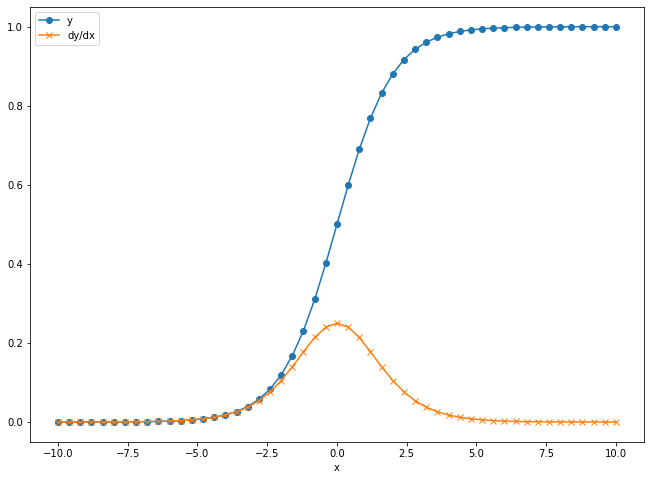

In [ ]:
##########################################################################################
#      PRACTICAL EXAMPLE for the gradient of an activation function
##########################################################################################

x = tf.linspace(-10.0, 10.0, 50+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

#################################
#     Display y(x) and dy/dx (x)
#################################
plt.figure(figsize=(11,8))
plt.plot(x, y, '-o', label='y')
plt.plot(x, dy_dx, '-x', label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

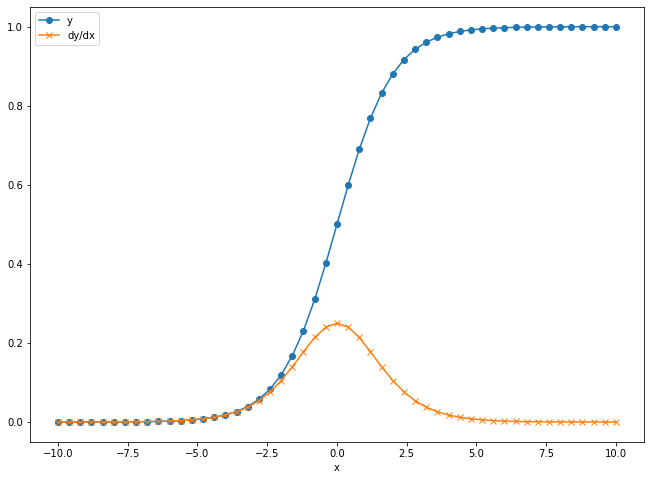